# Describing and examples for functions from "visualisations.py"

In [6]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

## `get_meshtraces`

When working with `plotly` you can get some trobles to use `numpy.meshgrid`. For example with plotting two-dimensional quadratic function:

In [2]:
x = np.linspace(-1,1, 50)
y = np.linspace(-1,1, 50)

xx, yy = np.meshgrid(x,y)
zz = (xx**2) + (yy**2)

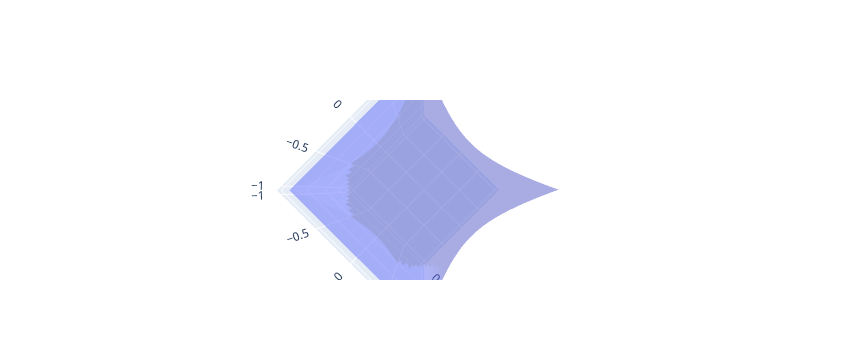

In [3]:
fig = go.Figure(data=[go.Mesh3d(    
    x=xx.ravel(),
    y=yy.ravel(),
    z=zz.ravel(),
    opacity=0.5, colorscale='deep_r',
    colorbar_thickness=25, 
    flatshading=True)])

fig.show()

This code adds to mesh some extra borders.

<img src="pictures/extra borders example.png">

To fix this you need to use method `update_traces` of figure. `DS_common.get_meshtraces` helps to get traces for meshgrid objects.

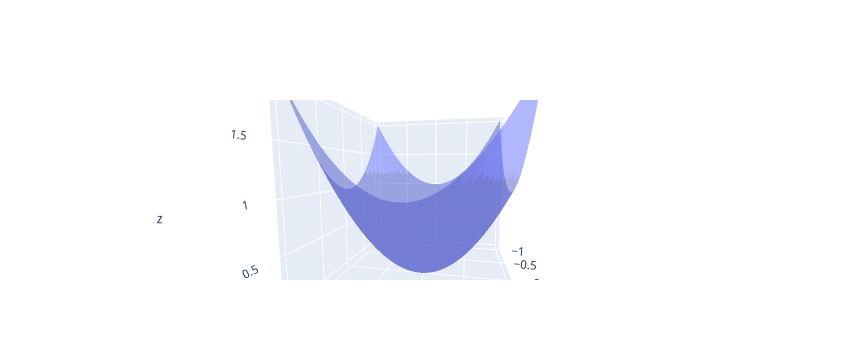

In [4]:
from visualisations import get_meshtraces

i_ind, j_ind, k_ind = get_meshtraces(xx)
fig.update_traces(i=i_ind,j=j_ind, k = k_ind, selector=dict(type='mesh3d'))
fig.show()


The result gona be:

<img src="pictures/traces updated.png">

# `pltl_dual_side_arrow`

Get list of annotations wich helps to build dual side arrows on plotly figures.

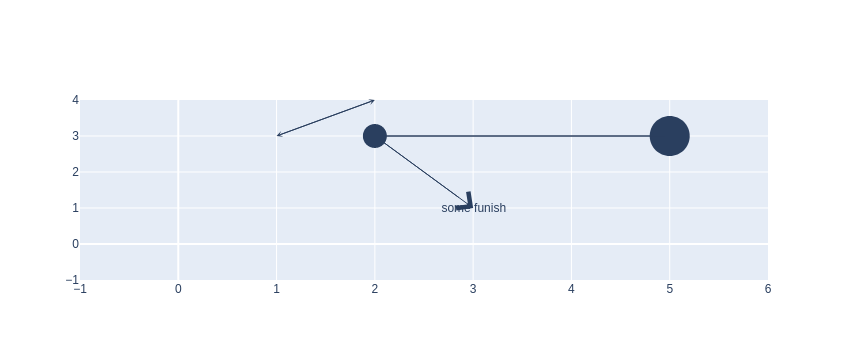

In [5]:
from visualisations import pltl_dual_side_arrow
fig = go.Figure()

fig.update_layout(
    annotations = 
        pltl_dual_side_arrow([1,2], [3,4]) + \
        pltl_dual_side_arrow(
            [5,2], [3,3], nose_kwargs = {"arrowhead" : 6, "arrowsize" : 10}
        ) + \
        pltl_dual_side_arrow(
            [3,2], [1,3], 
            nose_kwargs = {"arrowhead" : 4, "arrowsize" : 4},
            tail_kwargs = {"arrowhead" : 6, "arrowsize" : 6, "text": "some funish"}
        )
)

fig.show()